In [1]:
import pandas as pd
import json

##### Reading the json file to dataframe
I find it easier to explore the data with pandas

In [31]:
med_data = pd.read_json('Corona2.json')
print(med_data.shape)
med_data.head()

(31, 1)


,examples
0,"{'id': '18c2f619-f102-452f-ab81-d26f7e283ffe',..."
1,"{'id': '487c93e3-0d45-4088-a378-cf3a01c8953d',..."
2,"{'id': 'd5056874-895a-4a7f-9e0f-828d414d65d9',..."
3,"{'id': '20c792c7-0c4b-42d0-8127-0e04113db384',..."
4,"{'id': 'f5359e0d-4d4a-4707-95a3-4c627fc4a83b',..."


In [25]:
# did not find it very useful
# rather use the json package and see if flattening it can help
# load data using Python JSON module
with open('Corona2.json','r') as f:
    json_data = json.loads(f.read())
    
# Flattening the only column that I found in the earlier preview of the dataframe
df_nested_list = pd.json_normalize(json_data, record_path =['examples'])
print(df_nested_list.shape)
df_nested_list.head()

(31, 4)


,id,content,annotations,classifications
0,18c2f619-f102-452f-ab81-d26f7e283ffe,While bismuth compounds (Pepto-Bismol) decreas...,[{'id': '0825a1bf-6a6e-4fa2-be77-8d104701eaed'...,[]
1,487c93e3-0d45-4088-a378-cf3a01c8953d,"Diarrhea, also spelled diarrhoea, is the condi...",[{'id': '28601a42-c8a9-44e2-aeea-8939cb1db1a9'...,[]
2,d5056874-895a-4a7f-9e0f-828d414d65d9,Antiretroviral therapy (ART) is recommended fo...,[{'id': '0a4b4cc2-3a07-4817-8ccc-8fa1f945573d'...,[]
3,20c792c7-0c4b-42d0-8127-0e04113db384,The following drugs are considered as DMARDs: ...,[{'id': '0e370ff5-fee6-45e1-adcb-d5f00fa33b0d'...,[]
4,f5359e0d-4d4a-4707-95a3-4c627fc4a83b,"The goals of treatment are to reduce pain, dec...",[{'id': '10411ff5-e343-40bf-95d5-39cd1cb16060'...,[]


In [26]:
# Okay this looks better. I can see there are two main columns, content and the annotations
# the content holds the clinical notes in text format
# I'll focus on this and will keep aside the annotations for now
# id and classification do not seem useful, I'll drop them
med_notes = df_nested_list[['content']].copy()
med_notes.head()

,content
0,While bismuth compounds (Pepto-Bismol) decreas...
1,"Diarrhea, also spelled diarrhoea, is the condi..."
2,Antiretroviral therapy (ART) is recommended fo...
3,The following drugs are considered as DMARDs: ...
4,"The goals of treatment are to reduce pain, dec..."


In [11]:
# lets check one of the notes
med_notes['content'][0]

"While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.[92]\n\nDiosmectite, a natural aluminomagnesium silicate clay, is effective in alleviating symptoms of acute diarrhea in children,[93] and also has some effects in chronic functional diarrhea, radiation-induced diarrhea, and chemotherapy-induced diarrhea.[45] Another absorbent agent used for the treatment of mild diarrhea is kaopectate.\n\nRacecadotril an antisecretory medication may be used to treat diarrhea in children and adults.[86] It has better tolerability than loperamide, as it causes less constipation and flatulence.[94]"

##### Checking the length of the notes

In [29]:
med_notes['word_count'] = med_notes.content.apply(lambda x: len(x.split()))
med_notes.head()

,content,word_count
0,While bismuth compounds (Pepto-Bismol) decreas...,123
1,"Diarrhea, also spelled diarrhoea, is the condi...",90
2,Antiretroviral therapy (ART) is recommended fo...,80
3,The following drugs are considered as DMARDs: ...,223
4,"The goals of treatment are to reduce pain, dec...",113


<AxesSubplot: >

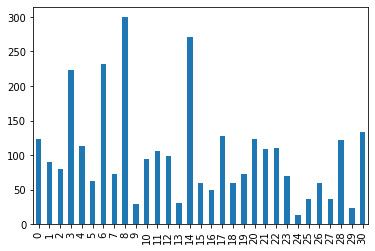

In [28]:
med_notes['word_count'].plot(kind='bar')

##### Generating word cloud 
It can give idea about what words appread most on the data

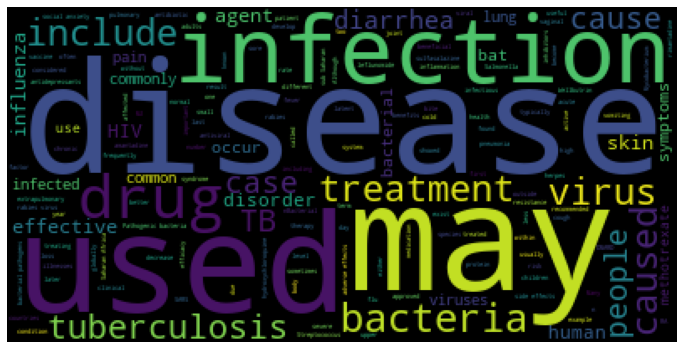

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = med_notes['content'].values 

plt.figure(figsize=(12,10))
wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [24]:
# saving the medical notes to the disk
med_notes.to_csv('./data/med_notes.csv', index=False)